In [ ]:
!pip install bertopic

In [8]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv("/content/bigdata_skills.csv")  # Replace with your actual file path
df['Job_Role'].fillna('', inplace=True)

# Assuming 'Job_Role' contains the job titles
documents = df['Job_Role'].tolist()




In [9]:
# Convert the job roles into numerical data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
job_role_tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Apply BERTopic for job role clustering
topic_model = BERTopic()
job_role_clusters, job_role_topics = topic_model.fit_transform(documents)

# Assign job role clusters back to the dataframe
df['Job_Role_Cluster'] = job_role_clusters



.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:

# Find the most common job role within each cluster
most_common_job_roles = df.groupby('Job_Role_Cluster')['Job_Role'].apply(lambda x: x.mode().iloc[0])

# Display each cluster along with its most common job role and competence terms
for job_role_cluster in most_common_job_roles.index:
    cluster_data = df[df['Job_Role_Cluster'] == job_role_cluster]
    most_common_job_role = most_common_job_roles[job_role_cluster]
    competence_terms = ', '.join(cluster_data['Skills'])  # Replace 'Skills' with your actual column name

    print(f"Cluster {job_role_cluster}:")
    print(f"Most Common Job Role: {most_common_job_role}")
    print(f"Competence Terms: {competence_terms}")
    print("\n")

In [ ]:
# Sort clusters by size and select the top 20
top_clusters = df['Job_Role_Cluster'].value_counts().head(20).index

# Display information for the top 20 clusters
for job_role_cluster in top_clusters:
    cluster_data = df[df['Job_Role_Cluster'] == job_role_cluster]
    most_common_job_role = cluster_data['Job_Role'].mode().iloc[0]
    competence_terms = ', '.join(cluster_data['Skills'])  # Replace 'Skills' with your actual column name

    print(f"Cluster {job_role_cluster}:")
    print(f"Most Common Job Role: {most_common_job_role}")
    print(f"Competence Terms: {competence_terms}")
    print("\n")

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

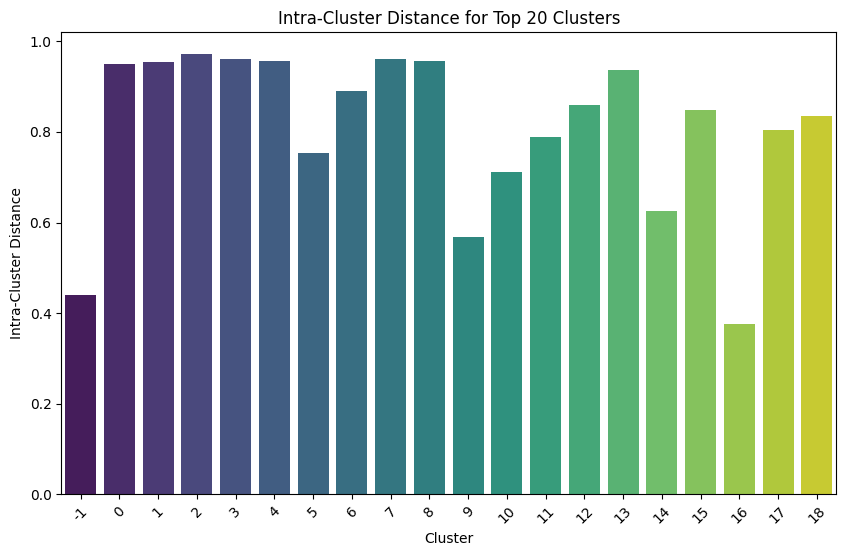

In [19]:
# Calculate intra-cluster distance for each cluster
intra_cluster_distances = []

for job_role_cluster in top_clusters:
    cluster_data = df[df['Job_Role_Cluster'] == job_role_cluster]
    cluster_tfidf_matrix = tfidf_vectorizer.transform(cluster_data['Job_Role'])
    cosine_similarities = cosine_similarity(cluster_tfidf_matrix)
    mean_similarity = cosine_similarities.mean()

    intra_cluster_distances.append(mean_similarity)

# Plot the intra-cluster distance graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clusters, y=intra_cluster_distances, palette='viridis')
plt.title('Intra-Cluster Distance for Top 20 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Intra-Cluster Distance')
plt.xticks(rotation=45)
plt.show()